# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


Based on [this](https://stackoverflow.com/a/22149930/1899061), in all computations, `axis=...` refers to the axis **along which** the computation is done. By default, `axis=0`. This is consistent with the `numpy.mean` usage when axis is specified explicitly (in `numpy.mean`, `axis==None` by default, which computes the mean value over the flattened array), in which `axis=0` along the rows (namely, index in pandas), and `axis=1` along the columns.
Note also that that `axis=0` indicates aggregating along rows and `axis=1` indicates aggregating along columns. This is consistent with how we index into a dataframe. In `df.iloc[<row>, <column>]`, `<row>` is in index position 0 and `<column>` is in index position 1. For added clarity, one may choose to specify `axis='index'` (instead of `axis=0`) or `axis='columns'` (instead of `axis=1`).
**But**, `axis=0` means each row as a bulk - we manipulate a `pd.DataFrame` inter-row, instead of within-row. Likewise, 1 means each column as a bulk, i.e. we manipulate a `pd.DataFrame` inter-column instead of within-column. For example, `<pd.df>.drop("A", axis=1)` will drop a whole column.

### Reading the dataset
`pd.read_csv()`

### Initial examination and adaptations
`<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`
`<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
`ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

### Missing values and value counts
`<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isnull(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts(normalize=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)`

### Examining individual data items, rows and columns
`<pd.df>.sample()`
Simple indexing and fancy indexing: `<pd.df>.iloc()`, `<pd.df>.loc()`
`<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

### Grouping and sorting data
`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
`<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
`<pd.df>.sort_values(by='<column name>', ascending=False/True)`
`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
`<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


### Data transformations
`<pd.df>.describe()`
`pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
`<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the `<column>`; for example, each element of the `<column>` can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns.
`sb.heatmap()`
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic does not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb* (the last line is added subsequently):

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%config IPCompleter.greedy=True

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import seaborn as sb

from plotnine import ggplot, aes, labs, geom_line, geom_histogram, theme_xkcd

In [2]:
# %run "import_packages.ipynb"

## Introducing The Beatles dataset

### Read The Beatles songs *csv* file
`pd.read_csv()` returns a `pd.DataFrame` object.

In [3]:
# Get the songs as a pd.DataFrame object from 'data/The Beatles songs dataset, v1.csv'

### Explore the dataset (first steps)

##### Initial examination and adaptations
`<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`
`<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
`ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

`<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, **<u>`<pd.df>.info()`**</u>, `<pd.df>.describe()` (shows descriptive statistics for numerical columns only).

`<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`

Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [4]:
# Get the columns as a pd.Index object

# Get the columns as a list

# Get the columns as a numpy.ndarray object, using <pd.df>.columns.values or np.array(<pd.df>.columns)

# Get the columns as a list from a numpy.ndarray object using <numpy.ndarray object>.tolist()

# Get the values of all items in the dataset as a numpy.ndarray of lists of the values in each item, using <pd.df>.values (the type is numpy.ndarray)


Rename columns.

`<pd.df>.rename(columns={'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, inplace=True)`, or
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns', inplace=True)`;
`<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in `<pd.df>`)

In [5]:
# Rename the Duration column to Length and Genre to Gen

# Rename the Length column back to Duration and Gen back to Genre


##### Missing values and value counts
`<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts(normalize=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)`

The `cmap` parameter denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

In [6]:
# Display the heatmap (missing values) of The Beatles songs dataset (demonstrate using sb.heatmap() vs. sb.heatmap();)

How many missing values are there? (`<pd.df>.isna().sum()` for all columns, `<pd.df>.['<column>'].isna().sum()` for a specific column, `<pd.df>.[['<column1>', 'column2', ...]].isna().sum()` for selected multiple columns; `isnull()` is the same as `isna()`, and `isna()` is used more often).

### Examining individual data items, rows and columns
`<pd.df>.sample()`
Simple indexing and fancy indexing: `<pd.df>.iloc()`, `<pd.df>.loc()`
`<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

Take a sample of the dataset to get a feeling of what's in there.

What are the songs with missing `Album.debut` values?

Using `isna()`, `loc()`, `iloc()`, `len()` and `index`.
Defining the relevant index with `<pd.df>.loc[<pd.df>['<column>'].isna()].index` is a good starting point when using `iloc[]` subsequently.
If using `iloc[]`, don't forget the `.index` chunk in `<pd.df>.loc[<pd.df>['<column>'].isna()].index` - without it, the result is another `<pd.df>`.
if defining the index to be used with `loc[]` subsequently, define it over a single column, like `<pd.df>['<column>'].isna()`.

In [7]:
# Define i_iloc, the index to be used with iloc[]
# iloc[] can be used conveniently here if the relevant index is already defined with <pd.df>.loc[<pd.df>['<column>'].isna()].index;
# remember that the second index in iloc[] must be a number too (the relevant column index)

# Define i_loc, the index to be used with loc[]


Replace `NaN` values in `Album.debut` with 'No' (these songs have not appeared on any of the official albums).

In [8]:
# display(songs.loc[i_loc, ['Title', 'Album.debut']])
# display(songs.iloc[i_iloc, [0, 2]])

# Make the replacement and display it


Double-check the missing values now:

In [9]:
# Use <pd.df>.isna().sum() or sb.heatmap(<pd.df>.isna(), cmap='...')

How many songs from The Beatles early years are there?

In [10]:
# Define early years using a list comprehension

# Use a combination of len(), <pd.df>.loc() and isin()


### Grouping and sorting data
`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
`<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
`<pd.df>.sort_values(by='<column name>', ascending=False/True)`
`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
`<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


How many unique values for `Year` are there in the dataset (`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`)?

Group the songs in the dataset by the year of release (`<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`). The result can be `songs_by_year`. Display it, show its type, and explore its individual groups and their types.

How many songs are there in the dataset for each `Year` (`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts()[<year>]`, `<pd.df>['<column>'].value_counts().sort_index()`)?

Sort the songs from the dataset by the year of release (`<pd.df>.sort_values(by='<column name>', ascending=False/True)`).
(It is also possible to use `inplace=True` in `sort_values()`, but it will change the order of songs in the dataset from that point on.)

Group the songs in the dataset by the year of release and display `mean` and/or `max` duration of the songs in each year, as well as the number (`count`) of songs in each year (`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`), `<pd.df>.groupby('<column>').<another column>.agg(['f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`, `max()`,...)).
If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.

### Data visualization
Plot some scatterplots, line plots, bar graphs, histograms, scatterplots, box plots, violins, heatmaps,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

<u>**Note that it is also possible to**</u> <u>**[plot lines, bargraphs,... with Pandas only](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)**</u> (although in such cases Pandas interacts with Matplotlib under the surface).

##### Scatterplot

Read a slightly different dataset.

In [20]:
# Get the songs as a pd.DataFrame object from 'data/The Beatles songs dataset, v2.csv'


Check for missing values (use, e.g., `sb.heatmap(<pd.df>.isna(), cbar=False, cmap='viridis')`).

Scatterplot the relationship between `Duration` and `Other.releases`.

To set the ranges of values on x-axis and y-axis (`Duration`, `Other.releases`), check the max values or run `describe()`.

###### 1. Matplotlib version

Use the following syntax:
`ax = plt.axes()`
`ax.set(xlim=(<from>, <to>), ylim=(<from>, <to>), xlabel='<xlabel>', ylabel='<ylabel>', title='<title>')`
`ax.scatter(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', c='<color>');`
The color parameter (`c`) is optional; if present, it should be a scalar or a sequence of length consistent with the lengths of `<X>` and `<Y>` (`(<X>, <Y>)` points). The `marker` parameter is optional as well. Both `c` and `marker` have defaults. For other values of `c` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively.

Alternatively:
`ax.plot(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', color='<color>');`

###### 2. Plotnine version
In *Plotnine*, the syntax for setting the ranges on x and y axes is `xlim(<from>, <to>)`, `ylim(<from>, <to>)`.

If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as `( ggplot(<df>, aes(x='<X>', y='<Y>) + geom_point(color='<color>', fill='<fill color>', shape='<shape>', size=<size>) + labs(x='...', y='...', title='...') ).draw();`.
The `color`, `fill` and `shape` parameters have defaults. The other values of these parameters are the same as in Matplotlib (see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively).

###### 3. A brief analysis of the plot: What are the shortest/longest songs and their durations?

In [21]:
# display(<pd.df>['column'] <= <value>)                                    # Boolean mask
# display(type(<pd.df>['column'] <= <value>))                              # pd.Series
# display(<pd.df>[<pd.df>['column'] <= <value>]['column to to display'])   # select one column
# display(<pd.df>[<pd.df>['column'] <= <value>]['column 1  to to display', 'column 2 to display',...])   # select multiple columns

# Try this also with .loc[], as well as with an explicitly set index and with .index


##### Line plot

How many songs from 1964 are there?

In [39]:
# Use <pd.df>['<column>'].value_counts(), <pd.df>['<column>'].value_counts()[<specific value> in <column>]

Sort this result by index: `pd.Series.sort_index()` (there is also `pd.DataFrame.sort_index()`).

In [40]:
# Define val_counts_sorted_by_index

Preparation for plotting (`counts` on y-axis, `year` on x-axis): get the `ndarray` version of `val_counts_sorted_by_index` using `np.array()`, as well as of `val_counts_sorted_by_index.index`.

And now plot it.

###### 1. Matplotlib version
`ax = plt.axes()`
`ax.set(xlim=(<lower limit>, <upper limit>), ylim=(<lower limit>, <upper limit>), xlabel='...', ylabel='...', title='...')`
`ax.plot(<x>, <y>, color='...', marker='<marker type>', linewidth=<number>, alpha=<number>)`
Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

###### 2. Plotnine version
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

For some reasons, running the Matplotlib version immediately before running the Plotnine version sometimes resets all values in `year` to 1970 (!!!), so re-creating `year` here might be necessary.

In [41]:
# year = np.array(val_counts_sorted_by_index.index)
# display(year)

If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as `( ggplot(<df>, aes(<x> = '<X>', <y> = '<Y>) + geom_line(color='<color>', size=<size>, alpha=<transparency, 0-1>, linetype='<linetype>')+ labs(x='...', y='...') ).draw();`).
Examples of parameters in `geom_line()`: `color='steelblue'`, `size=1`, , `linetype='solid'`, `alpha=0.8` (alpha: transparency (0-1)).


###### 3. Plot two versions of the diagram in two subplots
(adapted here from [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) example)

Smoothen the curves. Based on [this](https://stackoverflow.com/a/5284038/1899061).

`from scipy.interpolate import make_interp_spline, BSpline`

`<x> = <definition of x-axis variable>`
`<y> = <definition of y-axis variable>`

`<x_smooth> = np.linspace(<x>.min(), <x>max(), 300)`&emsp;&emsp;&emsp;&emsp;# 300: the number of points to make between `<x>.min() and <x>.max()`
`spl = make_interp_spline(year, counts, k=3)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; # type: BSpline
`<y_smooth> = spl(<x>_smooth)`

`plt.xlim([<lowest value of x to show on the plot>, <highest value of x to show on the plot>])`
`plt.ylim([<lowest value of y to show on the plot>, <highest value of x to show on the plot>])`

`plt.plot(<x_smooth>, <y_smooth>)`
`plt.plot(<x>, <y>)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# optional: show the segmented line on the same plot as well
`plt.show()`



In [43]:
# # 300 represents the number of points to make between T.min and T.max
# T = np.array([6, 7, 8, 9, 10, 11, 12])
# power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
#
# # plt.plot(T,power)
# # plt.show()
#
# xnew = np.linspace(T.min(), T.max(), 300)
#
# spl = make_interp_spline(T, power, k=3)  # type: BSpline
# power_smooth = spl(xnew)
#
# plt.plot(xnew, power_smooth)
# plt.show()

# from scipy.interpolate import make_interp_spline, BSpline
#
# year_smooth = np.linspace(year.min(), year.max(), 300)
# spl = make_interp_spline(year, counts, k=3)  # type: BSpline
# counts_smooth = spl(year_smooth)
#
# plt.xlim([1961, 1980])
# plt.ylim([0, 70])
#
# plt.plot(year_smooth, counts_smooth)
# plt.plot(year, counts)
# plt.show()
#
# # For some reasons, this did not work
# # ax1.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8)    # alpha: transparency (0-1)
# # display(type(ax1.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8)))    # alpha: transparency (0-1)
# # # ax1.show()

##### Histogram

Use Pandas to extract song lengths as a `pd.Series` object (`<pd.Series object> = <pd.df>['<column>']`).

In [44]:
# Get the song lengths as a pd.Series object


In [45]:
# Convert the song lengths into a NumPy array (using <song lengths>.values)


###### 1. Matplotlib version
Plot the histogram of the song lengths using Matplotlib (minimal version: `plt.hist(<x>, <number of bins>);`).

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme()` (or just `sb.set()`, but that function might get deprecated and removed from *Seaborn* in the future). See [`sb_set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults.

In [46]:
# Set plot style using sb.set_theme()

# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins


###### 2. Plotnine version
Plot the histogram of the song lengths using *Plotnine* `( ggplot(songs, aes(x='Duration')) + geom_histogram(bins=<number of bins>, fill='<fill color>', color='<line color>', size=<line thickness>, alpha=<transparency, 0-1>) + + labs(x='...', y='...') ).draw();`).
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

In [47]:
# plot = ggplot(songs, aes(x='Duration'))
# plot + geom_histogram(bins=40)


To avoid the annoying text output like `<ggplot: (177159008578)>` under the plot, use the following syntax: `( ggplot(<df>, aes(<x> = '<X>', <y> = '<Y>) + geom_histogram() + labs(x='...', y='...') ).draw();`)

###### 3. Multiple subplots
(shown here after [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html))

In [42]:
# # From https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# fig = plt.figure()
# ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],
#                    xticklabels=[], ylim=(-1.2, 1.2))
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    ylim=(-1.2, 1.2))
# # Meanings of the numbers in [0.1, 0.55, 0.8, 0.4]:
# #     0.1 - distance from the left edge of fig (grey area)
# #     0.55 - distance between the upper and lower subplots (0.5: they touch each other)
# #     0.8 - distance from the right edge of fig (grey area)
# #     0.4 - area assigned to the upper/lower subplot (ax1/ax2) along the vertical axes
# # Experiment with these numbers to get a better feeling for them
#
# x = np.linspace(0, 10)
# ax1.plot(np.sin(x))
# ax2.plot(np.cos(x));


# fig, ax = plt.subplots()
# ax

# fig = plt.figure()
# # fig
# ax1 = fig.add_axes([0.1, 0.65, 0.8, 0.4],
#                    xlim=(1961, 1980), ylim=(0, 70),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    xlim=(1961, 1970), ylim=(0, 70),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# # display(type(ax1))
#
# ax1.plot(year, counts, color='steelblue', linewidth=3, alpha=0.8)    # alpha: transparency (0-1)
# ax2.plot(year, counts, color='purple', linewidth=3, alpha=0.8);    # alpha: transparency (0-1)

##### Bar graph

How many Beatles songs have reached Billboard Top 50?

Read the dataset ('data/The Beatles songs dataset, v2.csv') and make some minor transformations.

Add another column, `Top50`: a song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

Create the index of the songs that HAVE reached Billboard Top 50: `i = songs.loc[songs['Top.50.Billboard'] != -1].index` or `i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)`.

Check if the newly added `Top50` column is now OK. Try this using the index created in the previous step, as well as using `i = songs.loc[songs['Top.50.Billboard'] != -1].index` directly.

<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u>

###### Preparing the data for plotting the bar graph

Group the data - group the songs by the year of release.

Use `get_group(<year>)` to get all songs for a selected year and `value_counts()` over the resulting group's `Top50` column (showing the `Yes` and `No` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `Year` column and then `np.sort()` the results.

For y-axis, create the lists of the numbers of the songs that have reached Billboard Top 50 (`in_top50`) and of those that haven't (`not_in_top50`).
(Start from two empty lists. Loop over the sorted list of years created in the previous step, `get_group()` for each year and append the `value_counts()['Yes']` of the `Top50` column of the current year (`y['Top.50']`) to `in_top50` if any of `y['Top.50']` has the value `Yes`, otherwise append 0. Do the similar thing for `not_in_top50`. Display both lists in the end to double-check the result.)

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `in_top50` and `not_in_top50` as the columns, and the sorted list of years created above as the index of the dataframe.

In [50]:
# # The role-model example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)


Use `ax = <pd.df>.plot.bar()` to plot the bargraph. Relevant parameters: `rot=<rotation angle [degrees]>` for the x-axis labels, `ylim=(<from>, <to>)`, `color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}` (for a list of Matplotlib named colors, see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors)), `edgecolor='<color of bin lines>`, `title='<title>'`, `xlabel='<xlabel>'`, `ylabel='<ylabel>'`, `fontsize=<fontsize>` (for all text; suitable fontsizes are 10, 12,...), `stacked=True` (the bins for the same x-axis value stacked on top of one another). The returned value (`ax`) is usually unnecessary and can be omitted.

##### Box plot
Based on [this](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
For Seaborn color palette names see [this](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) or [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/). To list the names of some ('quantitative') Seaborn color palettes, use `sns.palettes.SEABORN_PALETTES.keys()` (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/) and [this](https://www.codecademy.com/article/seaborn-design-ii) for additional named palettes).

Read the dataset ('data/The Beatles songs dataset, v2.csv').

Use `sb.boxplot()` to plot some boxplots. For a single-column boxplot, relevant parameters are `y=<pd.df>['column']` (for 'vertical' boxplot) or `x=<pd.df>['column']` (for 'horizontal' boxplot), and `palette='palette'` (e.g., 'Set3', 'pastel', ...; see the links above for other named color palettes). For a single-column boxplot, relevant parameters are `data=<pd.df>[['column1', 'column2',...]]`, `orient='v'` (for 'vertical' boxplot) and `palette='palette'`.

In [51]:
# display(sb.palettes.SEABORN_PALETTES.keys())

# For a single column (e.g., Duration)

# For multiple columns (e.g., Other.releases and Duration)


##### Violin plot
Combines box plot and density plot. Based on [this](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and [this](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Read the dataset ('data/The Beatles songs dataset, v2.csv').

Use `sb.violinplot()`. Relevant parameters: `x=<pd.df>[<indices of selected observations>, e.g. specific years]['<column for x-axis>', e.g. 'Year']`, `y=<pd.df>['<column for x-axis>', e.g. 'Duration']`, `data=<pd.df>`, `palette=<'<palette>'>, e.g. 'Set3', 'pastel',...)`. Try setting the index of selected observations both implicitly (directly in the `x` parameter) and explicitly (before the call to `sb.violinplot()`) and then using `x=<pd.df>.loc[<index>, '<column for x-axis>']`

##### Heat map
Based on [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Read the dataset ('data/The Beatles songs dataset, v3.csv'). This dataset already has been saved when plotting the bar graph above, so it already has the `Top50` column.

Categorize songs according to the number of other releases.
Insert a new column, e.g. `Other.releases.category` and set it to the default value `Medium`. Then split the range of `Other.releases` to five subranges, `very-Low` to `very_high` (find the `max()` of `Other.releases` first). Each such a subrange is actually an index of selected songs, based on the value of `Other.releases` (e.g., `very_low = songs['Other.releases'] < 10`). Then use `<pd.df>.loc[<index of selected observations>, <relevant column>]` to change the default value `Medium` where appropriate (e.g., `songs.loc[very_low, 'Other.releases.category'] = 'Very Low'`).

Rearrange the categories of `Other.releases.category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values`: e.g. 'Duration'
- `index`: to be shown on y-axis, e.g. 'Other.releases.category'
- `columns`: to be shown on x-axis, e.g. 'Year'

In [52]:

# # Alternatively
# s = songs.pivot_table(values='Duration', index=['Very Low', 'Low', 'Medium', 'High', 'Very High'], columns='Year')

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).
It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).
Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use '.0f' to show int values in annotations, not scientific notation ('g' for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is 'icefire'

##### A fancier example
Average duration of songs over the years, represented as circles with sizes proportional to the numbers of songs. Based on

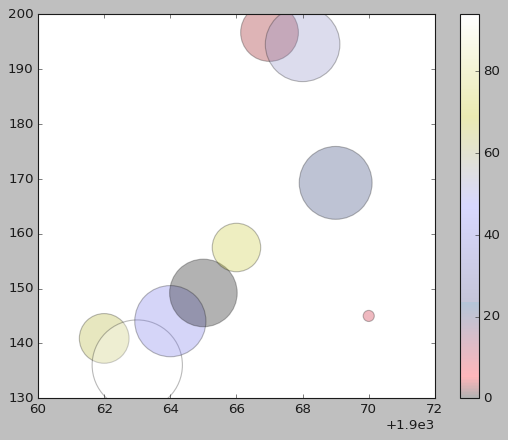

In [53]:
songs = pd.read_csv('data/The Beatles songs dataset, v2.csv')
songs_by_year = songs.groupby('Year')
years_1962_1970 = np.array(range(1962, 1971))

avg_duration = []
for year in years_1962_1970:
    avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
avg_duration = np.array(avg_duration)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years_1962_1970), replace=False)            # random sample, no duplicates
# display(colors)

sizes = []
for year in years_1962_1970:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                    # sizes proportional to the numbers of songs

plt.scatter(years_1962_1970, avg_duration,
            c=colors, s=sizes, alpha=0.3,                                     # alpha: the level of transparency
            cmap='gist_stern')                                                # cmap: a pre-defined color map
plt.colorbar();                                                               # show color scale

## Masking - Boolean arrays as masks

A simple example.
Create a small `pd.Series` object (e.g., `a`) and a boolean mask as a list of the same length (e.g., `mask`) and show the effect of running `a[mask]`.

An example from the 'data/The Beatles songs dataset, v2.csv' dataset.

Read the dataset.

Extract song release years into a NumPy array (use the `values` attribute of the `Year` column).

Extract songs released after 1968.
Create a mask (a Boolean array of the same length as `Year`), `True` if the year is greater than 1968, and show a slice of it. It is a simple relational expression, no need for `.loc[]`.

Get the titles of the first 10 songs released after 1968.
Use indexing with the mask created in the previous step.

In [54]:
# Get the titles of the first 10 songs such that years > 1968


Get the titles of the last 10 songs such that `years > 1968` and `times < 120`.
Create two simple masks, one for `Year` and another one for `Duration`, and use `&` in indexing the relevant observations in the dataframe. Remember to use the `values` attribute of both columns to convert the values to NumPy arrays.

In [55]:
# Get the titles of the last 10 songs such that years > 1968 and times < 120


Get the titles of all songs released 1966 or 1967, as well as the mean value of their lengths.
Create an appropriate mask for years, and use `np.mean()` to show the mean value of the lengths of the songs extracted using the mask.

## Fancy indexing
Fancy indexing is like simple indexing, but arrays of indices are passed in place of single scalars.

Create an array of 10 random integers (using `np.random.seed(<seed>)`, `<array> = np.random.randint(10, size=10)`) and a list of a couple of indices to select the relevant values from the array. Try also changing the values at these indices only.

## Sorting arrays

Create an `np.array` of `int` values and demonstrate that `np.sort(<np.array>)` does not change the array, whereas the `<np.array>.sort()` does (inplace sorting).

The `np.argsort()` function returns the *indices* that would sort an array.

What are the longest and the shortest Beatles songs?

Read the dataset, 'data/The Beatles songs dataset, v1.csv'.

Extract `times` - song durations - from the `values` attribute of the `Duration` column and pass it to `np.argsort()` to get the index that sorts the song times in the ascending order. To sort in descending order, use `(-<np.array>).argsort()` or `<index> = np.argsort(-<np.array>)` (see [this](https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order)).
Use the index created that way to print the titles and the durations of, e.g., ten longest songs and ten shortest songs. It boils down to fancy indexing the `Title` and `Duration` columns with the index created that way.